# Pipeline: Lane finding on images
We show an end to end processing pipeline from raw uncalibrated images to lanes including lane curvature etc

### Distortion correction
Read in raw uncalibrated images and correct for camera lens distortions

In [1]:
import cv2
import pickle, pprint

# Camera matrix and distortion coefficients obtained in 'Camera Calibration' notebook
calib_file = open('camera_calib.pickle','rb')
calib_dict = pickle.load(calib_file)
print('Read camera calibration objects:')
pprint.pprint(calib_dict)
calib_file.close()

#cameraMatrix = [[1.15777942e+03, 0.00000000e+00, 6.67111049e+02],
# [0.00000000e+00, 1.15282305e+03, 3.86129069e+02],
# [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]
#distCoeffs = [[-0.24688833, -0.02372814, -0.00109843, 0.00035105, -0.00259138]]

def cal_undistort(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist)
    return undist


Read camera calibration objects:
{'cameraMatrix': array([[1.15777942e+03, 0.00000000e+00, 6.67111049e+02],
       [0.00000000e+00, 1.15282305e+03, 3.86129069e+02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'distCoeffs': array([[-0.24688833, -0.02372814, -0.00109843,  0.00035105, -0.00259138]])}


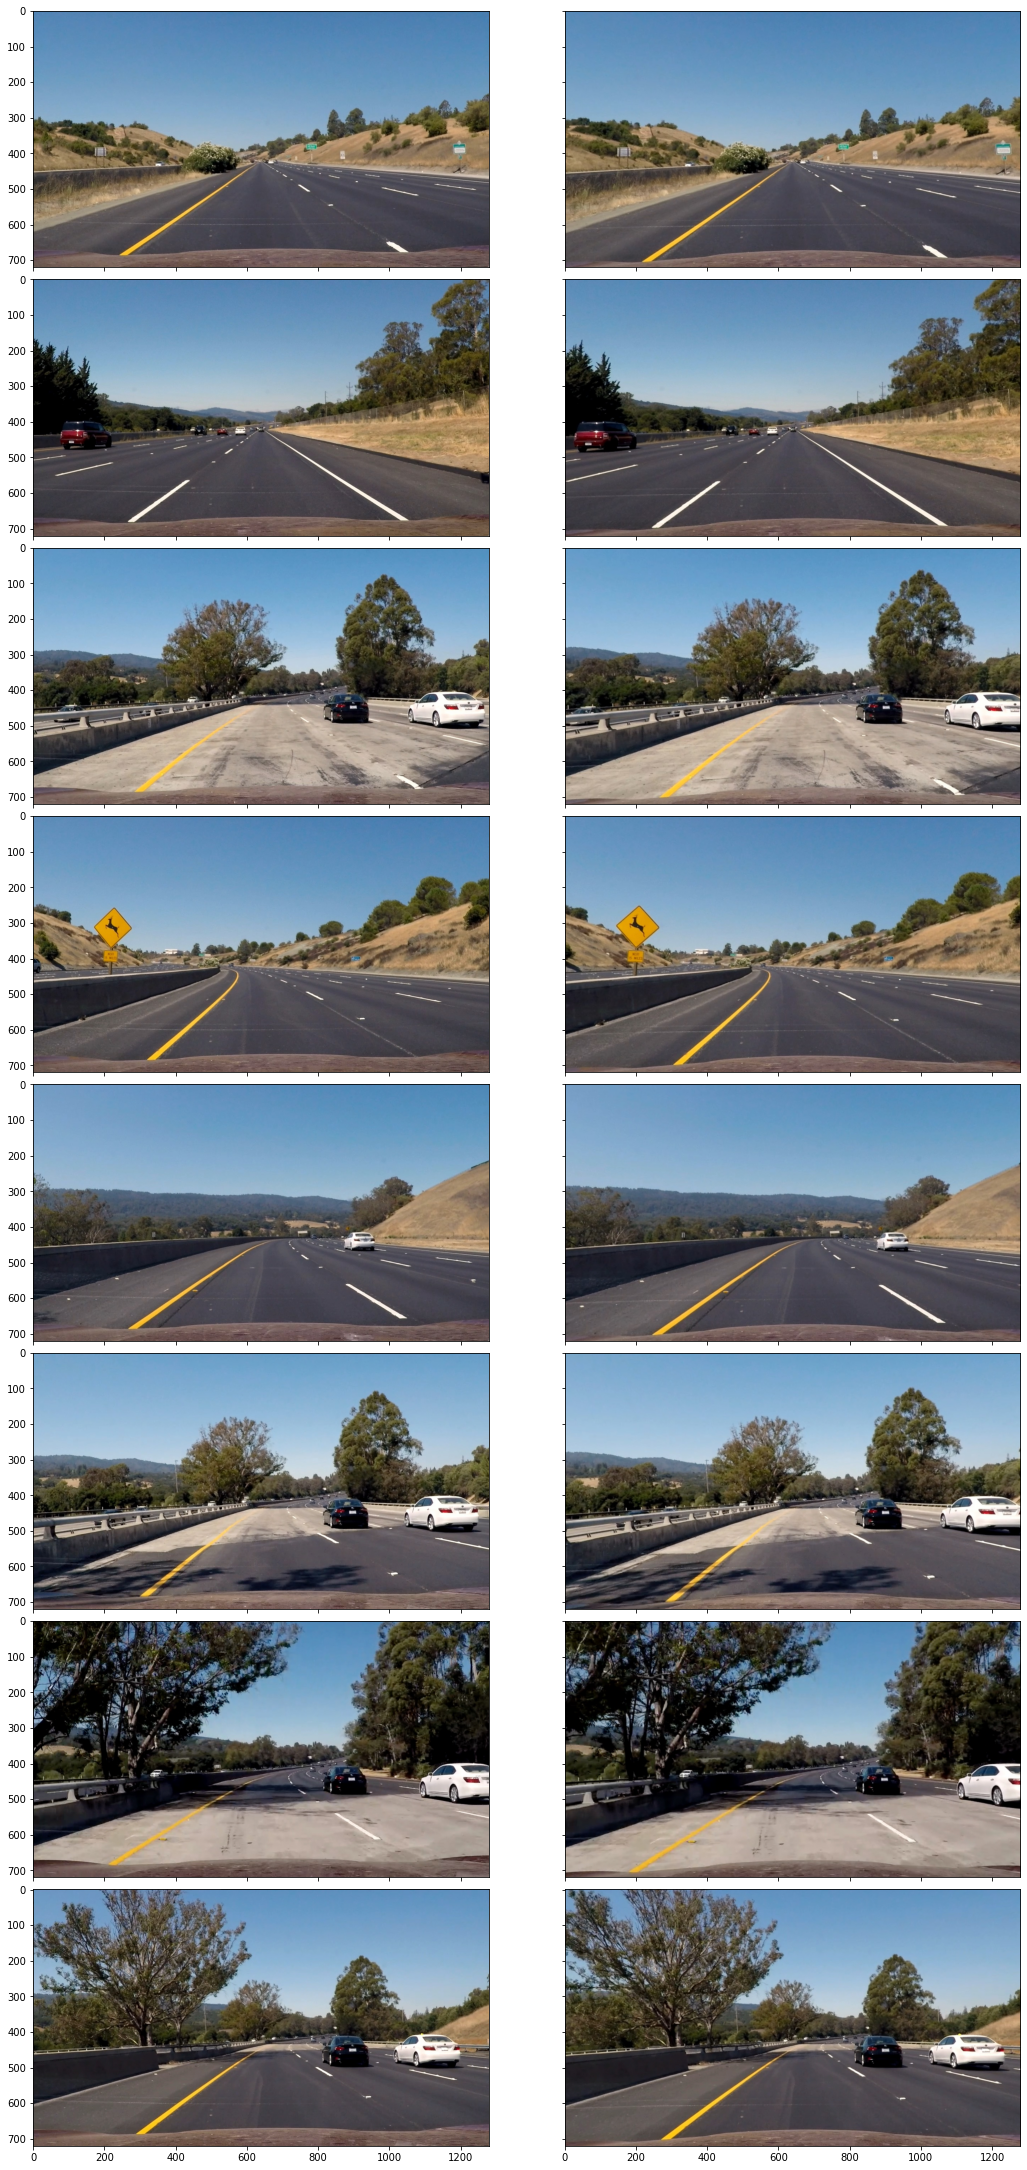

In [2]:
# Apply on test images
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt

# Get all file names
path = 'test_images'
file_names = [join(path,f) for f in listdir(path) if (isfile(join(path, f)) and (".jpg" in f))]

# Create canvas to thow original and undistorted images
fig, axes = plt.subplots(nrows=len(file_names), ncols=2,sharex=True,sharey=True,figsize=(15,30))
plt.tight_layout(pad=0.2)

for i, file_name in enumerate(file_names):
    
    # Read image
    img = cv2.imread(file_name)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Undistort
    undistorted = cal_undistort(img, calib_dict['cameraMatrix'], calib_dict['distCoeffs'])

    # Show
    axes[i][0].imshow(img)
    axes[i][1].imshow(undistorted)
    
